## Reading data from CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import sqlite3 as lite

%matplotlib inline

# Read csv file into a dataframe.
try:
    df = pd.read_csv('full_dataset_hour.csv', index_col=0)
except OSError:
    print("Filename not found!")
except Exception as e: print(e)

# index_col parmeter removes the 'unnamed column' which is added when reading from a csv
df.head()

,room_id,Campus,Building,Room,Capacity,Date,Day,SurveyPercentage,Count,LogDate,Module,NoStudents,WeekNo
0,3,Belfield,Computer Science,B-004,220,2015-11-03 09:00:00,Tue,0.75,62,2015-11-03 09:02:20,COMP41450 & COMP30120,143.0,45/2015
1,1,Belfield,Computer Science,B-004,220,2015-11-03 09:00:00,Tue,0.75,95,2015-11-03 09:07:24,COMP41450 & COMP30120,143.0,45/2015
2,2,Belfield,Computer Science,B-004,220,2015-11-03 09:00:00,Tue,0.75,113,2015-11-03 09:12:01,COMP41450 & COMP30120,143.0,45/2015
3,4,Belfield,Computer Science,B-004,220,2015-11-03 09:00:00,Tue,0.75,119,2015-11-03 09:16:53,COMP41450 & COMP30120,143.0,45/2015
4,5,Belfield,Computer Science,B-004,220,2015-11-03 09:00:00,Tue,0.75,124,2015-11-03 09:21:55,COMP41450 & COMP30120,143.0,45/2015


In [2]:
# Ignore this cell, turned out not to be necessary.

# I made the erroneous assumption before that the log files contained exactly 12 values for every lecture period.
# But this isn't always true, some of them contain 11.
# So plan to use regular expressions to count the rows for every lecture period using the time of day
# and the room it took place in. Then do something if it's greater or less than 12.

# find number of unique days
# for every day,
# for every hour
# for every class
# call buildlist() function and pass the number of items in that hour. 

# Big-O complexity is currently outrageous, sorry Anthony.

uniquedays = df['LogDate'].str.extract('(\d{4}-\d{2}-\d{2} )').unique()
uniquedays

# returns array object. maybe use .tolist? No longer being used but I can't face deleting it.

# for hour in hourlist:
#     print(hour, 'contains ', len(df[df.LogDate.str.match('2015-11-03 ' + hour + ':.*')]), 'entries')

# \d{4}\-\d{2}\-03 10:*
# matches 4 digits- 2 digits - DAYnumber (in this case 03) *space* HOURnumber. * means 'match any number of preceding token'
# '.str.match' above is fine for searching these specific dates but need regex for more general processing


# df['query'].str.extract(regex_desired_region_from_query)
# for extracting selected values


C:\Users\brendan\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


array(['2015-11-03 ', '2015-11-04 ', '2015-11-05 ', '2015-11-06 ',
       '2015-11-09 ', '2015-11-10 ', '2015-11-11 ', '2015-11-12 ',
       '2015-11-13 '], dtype=object)

In [3]:
df['UniqueClass'] = df['Date'] + ' ' + df['Room']
uniquedf = df['UniqueClass']

count = uniquedf.value_counts().sort_index()
count.head()

2015-11-03 09:00:00 B-002    12
2015-11-03 09:00:00 B-003    12
2015-11-03 09:00:00 B-004    12
2015-11-03 10:00:00 B-002    11
2015-11-03 10:00:00 B-003    11
Name: UniqueClass, dtype: int64

In [4]:
df = df.sort_values(['UniqueClass', 'LogDate']).reset_index(drop=True)
df.head()

# Now indexes match the count values so we can use them for loop traversal in the list builder

,room_id,Campus,Building,Room,Capacity,Date,Day,SurveyPercentage,Count,LogDate,Module,NoStudents,WeekNo,UniqueClass
0,3,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,2,2015-11-03 09:02:20,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002
1,1,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,1,2015-11-03 09:07:24,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002
2,2,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,0,2015-11-03 09:12:01,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002
3,4,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,0,2015-11-03 09:16:53,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002
4,5,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,1,2015-11-03 09:21:55,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002


In [5]:
df.shape

(2502, 14)

In [6]:
df.dtypes

room_id               int64
Campus               object
Building             object
Room                 object
Capacity              int64
Date                 object
Day                  object
SurveyPercentage    float64
Count                 int64
LogDate              object
Module               object
NoStudents          float64
WeekNo               object
UniqueClass          object
dtype: object

In [7]:
df.isnull().sum()

room_id               0
Campus                0
Building              0
Room                  0
Capacity              0
Date                  0
Day                   0
SurveyPercentage      0
Count                 0
LogDate               0
Module              685
NoStudents          732
WeekNo                0
UniqueClass           0
dtype: int64

We're trying to measure a relationship between connected WiFi hosts (MaxCount) and the ground truth data (Capacity * Survey Percentage) so we need a new column called 'GroundTruth'.

For now we only need a simple model so we will ignore module codes/students registered etc.

In [8]:
df['GroundTruth'] = df.Capacity * df.SurveyPercentage
df.head()

,room_id,Campus,Building,Room,Capacity,Date,Day,SurveyPercentage,Count,LogDate,Module,NoStudents,WeekNo,UniqueClass,GroundTruth
0,3,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,2,2015-11-03 09:02:20,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002,0.0
1,1,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,1,2015-11-03 09:07:24,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002,0.0
2,2,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,0,2015-11-03 09:12:01,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002,0.0
3,4,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,0,2015-11-03 09:16:53,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002,0.0
4,5,Belfield,Computer Science,B-002,90,2015-11-03 09:00:00,Tue,0.0,1,2015-11-03 09:21:55,NaN,NaN,45/2015,2015-11-03 09:00:00 B-002,0.0


In [9]:
# roomdf = df.copy(deep=True)

# testing
# roomdf = roomdf.loc[roomdf.Room == 'B-004']

df = df[['room_id', 'Count', 'GroundTruth', 'SurveyPercentage', 'Capacity', 'Room', 'LogDate', 'Date']]
# roomdf = roomdf.reset_index(drop = True)

df.head()


,room_id,Count,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date
0,3,2,0.0,0.0,90,B-002,2015-11-03 09:02:20,2015-11-03 09:00:00
1,1,1,0.0,0.0,90,B-002,2015-11-03 09:07:24,2015-11-03 09:00:00
2,2,0,0.0,0.0,90,B-002,2015-11-03 09:12:01,2015-11-03 09:00:00
3,4,0,0.0,0.0,90,B-002,2015-11-03 09:16:53,2015-11-03 09:00:00
4,5,1,0.0,0.0,90,B-002,2015-11-03 09:21:55,2015-11-03 09:00:00


In [10]:
maxlist = []
averagelist = []
medianlist = []
modelist = []
    
row = 0
for step in count:
    
    max = 0
    temp = []

    for j in range(row, row+step):
        temp.append(df.Count[j])
        if df.Count[j] > max:
            max = df.Count[j]

    maxlist.append(max)
    # make max list
    average = float(format(np.average(temp), '.2f'))
    # make average list
    #formatting to 2 decimal places produces string so need to cast as float
    median = np.median(temp)
    # make median list
    mode = stats.mode(temp[0])
    # make mode list (index 0 selects the value rather than the whole array)
    averagelist.append(average)
    medianlist.append(median)
    modelist.append((mode[0])[0])
    # index 0 is the value, 1 is the number of occurrences
    # second index 0 selects the value rather than an array containing the value + type
    # the scipy-stats module returns the lowest of any equally frequently occuring values.

    row += step


print("List of maximum values:\n", maxlist)

print("\nList of median values:\n", medianlist)

print("\nList of formatted average values:\n", averagelist)

print("\nList of mode values:\n", modelist)




List of maximum values:
 [21, 9, 130, 32, 12, 108, 36, 71, 67, 31, 44, 116, 29, 24, 58, 51, 42, 83, 58, 39, 76, 41, 12, 13, 15, 4, 36, 18, 16, 30, 14, 28, 64, 39, 103, 80, 35, 100, 19, 27, 69, 12, 9, 15, 3, 21, 14, 2, 30, 32, 232, 37, 36, 41, 39, 33, 78, 32, 53, 59, 26, 36, 105, 38, 36, 73, 55, 10, 2, 48, 14, 0, 3, 38, 30, 16, 53, 68, 23, 37, 33, 18, 27, 27, 19, 28, 56, 36, 65, 177, 46, 60, 24, 25, 24, 4, 19, 40, 31, 18, 43, 35, 22, 62, 36, 24, 59, 68, 38, 32, 15, 21, 42, 45, 26, 39, 81, 76, 17, 59, 15, 8, 70, 28, 23, 128, 34, 66, 75, 43, 38, 95, 29, 17, 68, 50, 36, 75, 49, 23, 69, 37, 7, 8, 15, 7, 28, 20, 10, 13, 21, 44, 60, 44, 97, 75, 23, 96, 9, 22, 77, 18, 33, 9, 39, 30, 23, 34, 14, 14, 93, 46, 13, 40, 42, 14, 76, 18, 71, 59, 17, 75, 88, 32, 25, 55, 70, 17, 6, 63, 20, 59, 9, 28, 20, 17, 30, 62, 19, 22, 38, 20, 30, 18, 16, 26, 49, 20, 54, 120, 21, 45, 15, 11, 20, 1]

List of median values:
 [2.0, 2.0, 120.5, 29.0, 7.0, 102.0, 27.0, 64.0, 60.0, 16.0, 19.5, 106.5, 13.0, 10.5, 52.5, 47

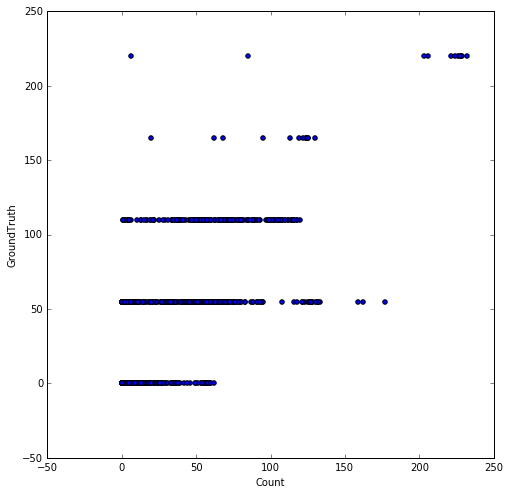

In [11]:
testplot = df.loc[df.Room == 'B-004']

testplot.plot(kind='scatter', x='Count', y='GroundTruth', figsize=(8, 8))

# we expect to observe five values for GroundTruth for a given room.

In [12]:
# test code below!
# the point of this is to remove all rows in between 1 and 12, 12 and 24 etc so the indexes will match
# the new columns in the numpy arrays below.

# Pandas docs say you 'should never modify something you are iterating over', possibly better to make a new dataframe?

# testing = roomdf.copy(deep=True) # did this above!
# testing = testing[1:12]
# testing.drop(testing.index[2:4], inplace=True)
# testing

df2 = pd.DataFrame(columns=df.columns)

row = 0
for step in count:
    df2 = df2.append(df.loc[row], ignore_index=True)
    row+=step

print(df2.shape)

df2.head()

(216, 8)


,room_id,Count,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date
0,3.0,2.0,0.0,0.00,90.0,B-002,2015-11-03 09:02:20,2015-11-03 09:00:00
1,3.0,2.0,0.0,0.00,90.0,B-003,2015-11-03 09:02:20,2015-11-03 09:00:00
2,3.0,62.0,165.0,0.75,220.0,B-004,2015-11-03 09:02:20,2015-11-03 09:00:00
3,3.0,28.0,45.0,0.50,90.0,B-002,2015-11-03 10:03:51,2015-11-03 10:00:00
4,3.0,8.0,67.5,0.75,90.0,B-003,2015-11-03 10:03:51,2015-11-03 10:00:00


In [13]:
# npmaxlist = np.asarray(maxlist)
# npaveragelist = np.asarray(averagelist)
# npmedianlist = np.asarray(medianlist)
# npmodelist = np.asarray(modelist)

# build numpy arrays from lists so they can be added to the dataframe
# (turns out not to be necessary, it's fine to just add lists)

print(len(maxlist), len(averagelist), len(medianlist), len(modelist))

# verify length of lists matches dimensions of dfroom2, length 69 (when selecting room B-004 only) or 216 for full dataset.


216 216 216 216


In [14]:
df2['MaxCount'] = maxlist
df2['AverageCount'] = averagelist
df2['MedianCount'] = medianlist
df2['ModeCount'] = modelist

try:
    df2 = df2.drop('Count', axis=1)
# no longer need count for specific time since we're using the average and maximum values for testing.
except ValueError:
    pass
# ValueError exception raised if Count has already been dropped.

df2.head()

,room_id,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date,MaxCount,AverageCount,MedianCount,ModeCount
0,3.0,0.0,0.00,90.0,B-002,2015-11-03 09:02:20,2015-11-03 09:00:00,21,4.75,2.0,2
1,3.0,0.0,0.00,90.0,B-003,2015-11-03 09:02:20,2015-11-03 09:00:00,9,2.58,2.0,2
2,3.0,165.0,0.75,220.0,B-004,2015-11-03 09:02:20,2015-11-03 09:00:00,130,102.25,120.5,62
3,3.0,45.0,0.50,90.0,B-002,2015-11-03 10:03:51,2015-11-03 10:00:00,32,29.27,29.0,28
4,3.0,67.5,0.75,90.0,B-003,2015-11-03 10:03:51,2015-11-03 10:00:00,12,7.36,7.0,8


In [15]:
df2['SurveyPercentage'] = df2['SurveyPercentage'].apply(lambda x: x*100)

df2.head()

,room_id,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date,MaxCount,AverageCount,MedianCount,ModeCount
0,3.0,0.0,0.0,90.0,B-002,2015-11-03 09:02:20,2015-11-03 09:00:00,21,4.75,2.0,2
1,3.0,0.0,0.0,90.0,B-003,2015-11-03 09:02:20,2015-11-03 09:00:00,9,2.58,2.0,2
2,3.0,165.0,75.0,220.0,B-004,2015-11-03 09:02:20,2015-11-03 09:00:00,130,102.25,120.5,62
3,3.0,45.0,50.0,90.0,B-002,2015-11-03 10:03:51,2015-11-03 10:00:00,32,29.27,29.0,28
4,3.0,67.5,75.0,90.0,B-003,2015-11-03 10:03:51,2015-11-03 10:00:00,12,7.36,7.0,8


### Measure correlation between connected devices and ground truth columns

In [16]:
df2[['MaxCount', 'GroundTruth']].corr().as_matrix()[0,1]

0.72330855124754734

In [17]:
df2[['AverageCount', 'GroundTruth']].corr().as_matrix()[0,1]

0.74420155428635848

In [18]:
df2[['MedianCount', 'GroundTruth']].corr().as_matrix()[0,1]

0.76426248111776518

In [19]:
df2[['ModeCount', 'GroundTruth']].corr().as_matrix()[0,1]

0.56975830898717972

Mediancount is more strongly correlated with GroundTruth so we will use this for our model.

### Training initial linear regression model

In [20]:
lm = sm.ols(formula="GroundTruth ~  MedianCount", data=df2).fit()

# Print the model's parameters and weights
print(lm.params)

Intercept      5.208960
MedianCount    0.880329
dtype: float64


In [21]:
test_minmax = pd.DataFrame({'MedianCount': [df2.MedianCount.min(), df2.MedianCount.max()]})
test_minmax.head()

,MedianCount
0,0.0
1,225.0


In [22]:
predictions = lm.predict(test_minmax)
predictions

array([   5.20896001,  203.28308168])

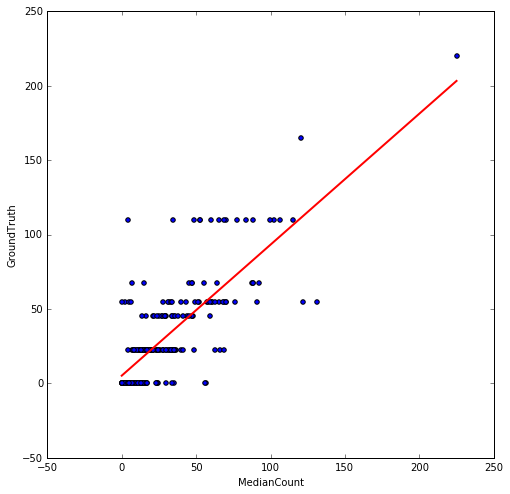

In [23]:
df2.plot(kind='scatter', x='MedianCount', y='GroundTruth', figsize=(8, 8))

plt.plot(test_minmax, predictions, c='red', linewidth=2)

In [24]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GroundTruth   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     300.5
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           1.21e-42
Time:                        14:06:33   Log-Likelihood:                -977.04
No. Observations:                 216   AIC:                             1958.
Df Residuals:                     214   BIC:                             1965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       5.2090      2.201      2.367      0.019         0.871     9.547
MedianCount     0.8803      0.051     17.336      0.000         0.780     0.980
==============================================================================
Omnibus:                       44.136   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.040
Skew:                           0.930   Prob(JB):                     4.22e-23
Kurtosis:                       5.827   Cond. No.                         62.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df2_train = df2[:int((0.7*df2.shape[0]))]
df2_test = df2[int((0.7*df2.shape[0])):]

# split into training and test sets

In [26]:
lm = sm.ols(formula="GroundTruth ~  MedianCount", data=df2_train).fit()

In [27]:
test_predictions = lm.predict(df2_test)
test_predictions

array([  18.80883058,   52.55424628,   41.153768  ,   85.84364285,
         68.970935  ,   21.54494537,   85.38762371,   11.96854361,
         20.6329071 ,   39.78571061,   16.07271579,   32.48940451,
          8.7764097 ,   37.04959582,   27.01717494,   25.19309842,
          6.95233317,    9.68844796,    9.68844796,   85.38762371,
         30.66532799,    9.23242883,   36.59357669,   32.03338538,
         11.96854361,   59.39453324,   18.80883058,   68.05889673,
         51.64220802,   10.60048622,   19.72086884,   81.28345153,
         31.57736625,   22.45698363,   53.01026541,   62.13064803,
         16.98475406,    5.12825665,   49.36211236,   16.07271579,
         56.65841846,   10.60048622,   26.56115581,    9.23242883,
         11.51252448,   31.57736625,   56.20239933,   15.16067753,
         24.28106015,   36.13755756,   18.35281145,   27.47319407,
          9.68844796,   16.98475406,   20.6329071 ,   26.10513668,
         21.54494537,   46.62599757,  110.01265679,   19.72086

In [28]:
df2_test['Predictions'] = test_predictions

C:\Users\brendan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df2_test.head()

,room_id,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date,MaxCount,AverageCount,MedianCount,ModeCount,Predictions
151,3.0,67.5,75.0,90.0,B-003,2015-11-11 11:08:11,2015-11-11 11:00:00,44,18.27,15.0,7,18.808831
152,3.0,55.0,25.0,220.0,B-004,2015-11-11 11:08:11,2015-11-11 11:00:00,60,51.55,52.0,52,52.554246
153,3.0,22.5,25.0,90.0,B-002,2015-11-11 12:03:11,2015-11-11 12:00:00,44,37.08,39.5,24,41.153768
154,3.0,67.5,75.0,90.0,B-003,2015-11-11 12:03:11,2015-11-11 12:00:00,97,81.50,88.5,40,85.843643
155,3.0,55.0,25.0,220.0,B-004,2015-11-11 12:03:11,2015-11-11 12:00:00,75,60.33,70.0,48,68.970935


In [30]:
#Pair the actual and the predicted values
print("Actual - Predicted:\n", (df2_test['GroundTruth'] - df2_test['Predictions']))
print("\n(Actual - Predicted) squared:\n", (df2_test['GroundTruth'] - df2_test['Predictions'])**2)

Actual - Predicted:
 151     48.691169
152      2.445754
153    -18.653768
154    -18.343643
155    -13.970935
156      0.955055
157    -17.887624
158    -11.968544
159    -20.632907
160      5.214289
161    -16.072716
162     -9.989405
163     13.723590
164    -37.049596
165     -4.517175
166     19.806902
167     -6.952333
168     -9.688448
169     -9.688448
170     24.612376
171     -8.165328
172     -9.232429
173     73.406423
174     -9.533385
175     10.531456
176     -4.394533
177      3.691169
178    -45.558897
179      3.357792
180    -10.600486
          ...    
186    -39.630648
187      5.515246
188     49.871743
189    -26.862112
190    -16.072716
191    -56.658418
192    -10.600486
193     18.438844
194     -9.232429
195    -11.512524
196     13.422634
197    -56.202399
198    -15.160678
199     -1.781060
200    -36.137558
201    -18.352811
202     -4.973194
203     -9.688448
204    -16.984754
205    -20.632907
206    -26.105137
207      0.955055
208     -1.625998
209    

In [31]:
# Mean squared error on the test set
mse = ((df2_test['GroundTruth'] - df2_test['Predictions'])**2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 714.1714590503848


In [32]:
print("Absolute value for Actual - Predicted:\n", abs((df2_test['GroundTruth'] - df2_test['Predictions'])))

Absolute value for Actual - Predicted:
 151     48.691169
152      2.445754
153     18.653768
154     18.343643
155     13.970935
156      0.955055
157     17.887624
158     11.968544
159     20.632907
160      5.214289
161     16.072716
162      9.989405
163     13.723590
164     37.049596
165      4.517175
166     19.806902
167      6.952333
168      9.688448
169      9.688448
170     24.612376
171      8.165328
172      9.232429
173     73.406423
174      9.533385
175     10.531456
176      4.394533
177      3.691169
178     45.558897
179      3.357792
180     10.600486
          ...    
186     39.630648
187      5.515246
188     49.871743
189     26.862112
190     16.072716
191     56.658418
192     10.600486
193     18.438844
194      9.232429
195     11.512524
196     13.422634
197     56.202399
198     15.160678
199      1.781060
200     36.137558
201     18.352811
202      4.973194
203      9.688448
204     16.984754
205     20.632907
206     26.105137
207      0.955055
208   

In [33]:
# Mean absolute error. Surprisingly not bad!
mae = abs(df2_test['GroundTruth'] - df2_test['Predictions']).mean()
print("Mean absolute error is: \n{}".format(mae))

Mean absolute error is: 
18.696909971057444


### Creating bins for the 'Predictions' value

In [34]:
def classify_prediction(df, i):

    # passing in this: df2_test.Predictions[row], row
    prediction = df.Predictions[i]
    
    capacity = df.Capacity[i]
    # selects the relevant capacity value for the room and assigns to a variable
    percentile_0 = 0
#     percentile_25 = capacity * 0.25
    percentile_50 = capacity * 0.5
#     percentile_75 = capacity * 0.75
    percentile_100 = capacity
    
# This is going to be disgusting, I'd like to find a better way of doing it.
    
#     if prediction <= (percentile_25 - ((percentile_25 - percentile_0)/2)):
#         return 0
#     # if prediction is closer to 0% than 25%, return 0%
#     # in this case: if prediction(43) is less than (40 - ((40-0)/2))
#     # so between range of 0 to 20
#     elif prediction >= percentile_25 - ((percentile_25 - percentile_0)/2) and prediction <= percentile_50 - ((percentile_50 - percentile_25)/2):
#         return 25
#     # if prediction (43) is greater than 20 and less than 60
#     elif prediction >= percentile_50 - ((percentile_50 - percentile_25)/2) and prediction <= percentile_75 - ((percentile_75 - percentile_50)/2):
#         return 50
#     # if prediction is greater than 60 and less than 100
#     elif prediction >= percentile_75 - ((percentile_75 - percentile_50)/2) and prediction <= percentile_100 - ((percentile_100 - percentile_75)/2):
#         return 75
#     # if prediction is greater than 100 and less than 140
#     elif prediction >= percentile_100 - ((percentile_100 - percentile_75)/2):
#         return 100

# making ternary bins rather than original 0/25/50/75/100
    if prediction <= (percentile_50 - ((percentile_50 - percentile_0)/2)):
        return 0
    elif prediction >= percentile_50 - ((percentile_50 - percentile_0)/2) and prediction <= percentile_100 - ((percentile_100 - percentile_50)/2):
        return 50
    # if prediction (43) is greater than 20 and less than 60
    elif prediction >= percentile_100 - ((percentile_100 - percentile_50)/2):
        return 100

# roomdf2_test['PredictedPercentage'] = roomdf2_test['Predictions'].map(classify_prediction)
# roomdf2_test

df2_test = df2_test.reset_index(drop = True)
percentage = []

print("Shape of df2_test is {}".format(df2_test.shape))

for row in range(df2_test.shape[0]):
    percentage.append(classify_prediction(df2_test, row))

df2_test['PredictedPercentage'] = percentage
df2_test.head()

# my_series.apply((lambda x: your_func(a,b,c,d,...,x)))
# my_series.apply(your_function, args=(2,3,4), extra_kw=1)

# mapping values to new column
# http://stackoverflow.com/questions/21029128/updating-pandas-dataframe-via-for-loops

Shape of df2_test is (65, 12)


,room_id,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date,MaxCount,AverageCount,MedianCount,ModeCount,Predictions,PredictedPercentage
0,3.0,67.5,75.0,90.0,B-003,2015-11-11 11:08:11,2015-11-11 11:00:00,44,18.27,15.0,7,18.808831,0
1,3.0,55.0,25.0,220.0,B-004,2015-11-11 11:08:11,2015-11-11 11:00:00,60,51.55,52.0,52,52.554246,0
2,3.0,22.5,25.0,90.0,B-002,2015-11-11 12:03:11,2015-11-11 12:00:00,44,37.08,39.5,24,41.153768,50
3,3.0,67.5,75.0,90.0,B-003,2015-11-11 12:03:11,2015-11-11 12:00:00,97,81.50,88.5,40,85.843643,100
4,3.0,55.0,25.0,220.0,B-004,2015-11-11 12:03:11,2015-11-11 12:00:00,75,60.33,70.0,48,68.970935,50


In [35]:
# testing accuracy of model excluding values that it currently doesn't account for
evaluation = df2_test[(df2_test.SurveyPercentage != 25) & (df2_test.SurveyPercentage != 75)]
evaluation.head()

,room_id,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date,MaxCount,AverageCount,MedianCount,ModeCount,Predictions,PredictedPercentage
7,3.0,0.0,0.0,220.0,B-004,2015-11-11 13:10:24,2015-11-11 13:00:00,9,7.40,7.5,9,11.968544,0
8,3.0,0.0,0.0,90.0,B-002,2015-11-11 14:00:45,2015-11-11 14:00:00,22,16.42,17.0,17,20.632907,0
9,3.0,45.0,50.0,90.0,B-003,2015-11-11 14:00:45,2015-11-11 14:00:00,77,41.17,38.0,77,39.785711,50
10,3.0,0.0,0.0,220.0,B-004,2015-11-11 14:00:45,2015-11-11 14:00:00,18,12.17,12.0,9,16.072716,0
13,3.0,0.0,0.0,220.0,B-004,2015-11-11 15:01:42,2015-11-11 15:00:00,39,35.25,35.0,28,37.049596,0


In [36]:
surveyvsprediction = (evaluation.SurveyPercentage - evaluation.PredictedPercentage)
print("Actual - Predicted:\n", surveyvsprediction)

# 0 means the prediction matches the survey.
print("\nCorrect observations: ", (surveyvsprediction.tolist()).count(0), " out of ", len(surveyvsprediction.tolist()))
print("\nAccuracy score: ", (surveyvsprediction.tolist()).count(0)/len(surveyvsprediction.tolist())*100)

Actual - Predicted:
 7      0.0
8      0.0
9      0.0
10     0.0
13     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
21     0.0
22    50.0
29     0.0
30     0.0
31     0.0
32     0.0
34    50.0
39     0.0
40   -50.0
41     0.0
42     0.0
43     0.0
44     0.0
45     0.0
46   -50.0
47     0.0
49     0.0
50     0.0
52     0.0
53     0.0
54     0.0
55     0.0
57     0.0
58     0.0
61    50.0
64     0.0
dtype: float64

Correct observations:  31  out of  36

Accuracy score:  86.11111111111111


In [37]:
lm.summary()
# The weight for features MedianCount and Intercept are found to be statistically significant (p-value < 0.05)
# R-squared values are middling, variance explained by the model is not very high but this is fine as we are
# attempting to predict with high accuracy/low granulity rather than the converse.

# measuring mean squared error and mean absolute error doesn't make much sense with the binned predictions as
# the values are categorical.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GroundTruth   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     305.4
Date:                Wed, 03 Aug 2016   Prob (F-statistic):           6.67e-38
Time:                        14:06:35   Log-Likelihood:                -667.77
No. Observations:                 151   AIC:                             1340.
Df Residuals:                     149   BIC:                             1346.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       5.1283      2.351      2.182      0.031         0.483     9.773
MedianCount     0.9120      0.052     17.475      0.000         0.809     1.015
==============================================================================
Omnibus:                       16.042   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.591
Skew:                           0.502   Prob(JB):                     6.19e-07
Kurtosis:                       4.881   Cond. No.                         64.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
try:
    con = lite.connect('wicount.sqlite3')
    df2_test.to_sql(con=con, name='analytics', if_exists='append', flavor='sqlite', index=False)
    # Set index to False because it's not a column but will be treated as one.
    print("Success! Table created or updated.")
except Exception as e: print(e)

# Problem at the moment: UNIQUE constraint failed: analytics.room_id, analytics.date
# Now using logdate instead of date as primary key.
# Writes fine otherwise.

Success! Table created or updated.


### General function to make and classify predictions

Should run a dataframe loaded from the database table

In [39]:
def make_predictions(df):
    wicountlm = sm.ols(formula="GroundTruth ~  MedianCount", data=df2).fit()
    # Print the model's parameters and weights
    print(lm.params)
    
    predictions = wicountlm.predict(df)
    df['Predictions'] = predictions
    
    
    df = df.reset_index(drop = True)
    percentage = []


    for row in range(df.shape[0]):
        percentage.append(classify_prediction(df, row))
        
    print(df.shape)

    df['PredictedPercentage'] = percentage
    return df
    
# testing using the full dataset (with one row per class)
df2.shape
make_predictions(df2)

Intercept      5.128257
MedianCount    0.912038
dtype: float64
(216, 12)


,room_id,GroundTruth,SurveyPercentage,Capacity,Room,LogDate,Date,MaxCount,AverageCount,MedianCount,ModeCount,Predictions,PredictedPercentage
0,3.0,0.0,0.0,90.0,B-002,2015-11-03 09:02:20,2015-11-03 09:00:00,21,4.75,2.0,2,6.969619,0
1,3.0,0.0,0.0,90.0,B-003,2015-11-03 09:02:20,2015-11-03 09:00:00,9,2.58,2.0,2,6.969619,0
2,3.0,165.0,75.0,220.0,B-004,2015-11-03 09:02:20,2015-11-03 09:00:00,130,102.25,120.5,62,111.288656,50
3,3.0,45.0,50.0,90.0,B-002,2015-11-03 10:03:51,2015-11-03 10:00:00,32,29.27,29.0,28,30.738513,50
4,3.0,67.5,75.0,90.0,B-003,2015-11-03 10:03:51,2015-11-03 10:00:00,12,7.36,7.0,8,11.371266,0
5,3.0,110.0,50.0,220.0,B-004,2015-11-03 10:03:51,2015-11-03 10:00:00,108,96.91,102.0,53,95.002562,50
6,3.0,45.0,50.0,90.0,B-002,2015-11-03 11:00:16,2015-11-03 11:00:00,36,28.73,27.0,23,28.977855,50
7,3.0,67.5,75.0,90.0,B-003,2015-11-03 11:00:16,2015-11-03 11:00:00,71,52.09,64.0,8,61.550044,50
8,3.0,110.0,50.0,220.0,B-004,2015-11-03 11:00:16,2015-11-03 11:00:00,67,56.45,60.0,58,58.028726,50
9,3.0,45.0,50.0,90.0,B-002,2015-11-03 12:01:23,2015-11-03 12:00:00,31,14.17,16.0,31,19.294231,0
